In [1]:
from transformers import VisionEncoderDecoderModel
from transformers import ViTFeatureExtractor, RobertaTokenizer, TrOCRProcessor
from transformers import VisionEncoderDecoderModel
from transformers import TrOCRProcessor
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
encode = 'google/vit-base-patch16-224-in21k'
decode = 'd42kw01f/Tamil-RoBERTa'

feature_extractor=ViTFeatureExtractor.from_pretrained(encode)
tokenizer = RobertaTokenizer.from_pretrained(decode)
processor = TrOCRProcessor(feature_extractor=feature_extractor, tokenizer=tokenizer)

model = VisionEncoderDecoderModel.from_pretrained("/Users/dishantpadalia/IITB/random/checkpoint-6000")

Downloading:   0%|          | 0.00/604k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/339k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

/Users/dishantpadalia/opt/miniconda3/envs/trocr/lib/python3.10/site-packages/transformers/models/trocr/processing_trocr.py:44: FutureWarning: The `feature_extractor` argument is deprecated and will be removed in v4.27, use `image_processor` instead.
  warnings.warn(


வித்யிய


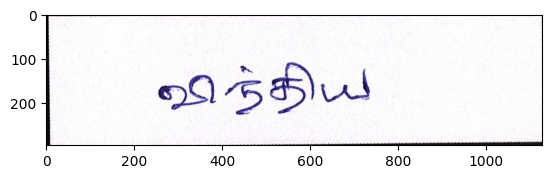

In [5]:
def preview(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    print(generated_text)
    
image_path = "/Users/dishantpadalia/IITB/random/ta/test/35.jpg"
preview(image_path=image_path)